In [14]:
import os

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image
import matplotlib.pyplot as plt
from pathlib import Path 
from PIL import Image, ImageOps

if not os.path.exists('./mlp_img'):
    os.mkdir('./mlp_img')


def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x


num_epochs = 100
batch_size = 128
learning_rate = 1e-3

img_transform = transforms.Compose([
    transforms.ToTensor()
    #transforms.ToTensor(),
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = MNIST('../pytorch_model_lstm/data', transform=img_transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True), 
            nn.Linear(64, 12), 
            nn.ReLU(True), 
            nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), 
            nn.Linear(128, 28 * 28), 
            nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = autoencoder().cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.view(img.size(0), -1)
        img = Variable(img).cuda()
        # ===================forward=====================
        output = model(img)
        loss = criterion(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.item()))
    if epoch % 10 == 0:
        pic = to_img(output.cpu().data)
        save_image(pic, './mlp_img/image_{}.png'.format(epoch))

torch.save(model.state_dict(), './sim_autoencoder.pth')

epoch [1/100], loss:0.0463
epoch [2/100], loss:0.0435
epoch [3/100], loss:0.0405
epoch [4/100], loss:0.0402
epoch [5/100], loss:0.0375
epoch [6/100], loss:0.0375
epoch [7/100], loss:0.0394
epoch [8/100], loss:0.0392
epoch [9/100], loss:0.0384
epoch [10/100], loss:0.0388
epoch [11/100], loss:0.0390
epoch [12/100], loss:0.0385
epoch [13/100], loss:0.0353
epoch [14/100], loss:0.0377
epoch [15/100], loss:0.0353
epoch [16/100], loss:0.0345
epoch [17/100], loss:0.0355
epoch [18/100], loss:0.0362
epoch [19/100], loss:0.0379
epoch [20/100], loss:0.0329
epoch [21/100], loss:0.0355
epoch [22/100], loss:0.0316
epoch [23/100], loss:0.0354
epoch [24/100], loss:0.0329
epoch [25/100], loss:0.0338
epoch [26/100], loss:0.0335
epoch [27/100], loss:0.0343
epoch [28/100], loss:0.0317
epoch [29/100], loss:0.0342
epoch [30/100], loss:0.0359
epoch [31/100], loss:0.0330
epoch [32/100], loss:0.0345
epoch [33/100], loss:0.0347
epoch [34/100], loss:0.0330
epoch [35/100], loss:0.0319
epoch [36/100], loss:0.0339
e

In [5]:
dataloader.__len__()

469

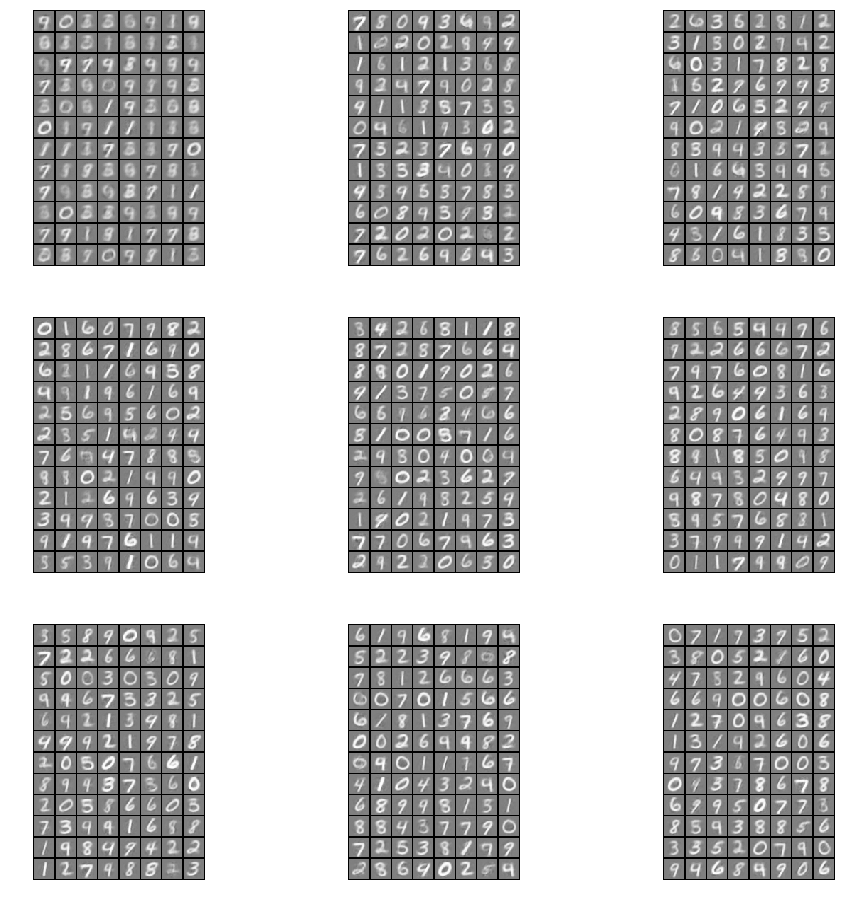

In [35]:

plt.figure(figsize=(16,16)) 

def plot_mnist(index,fname):
    ax = plt.subplot(3,3,index+1) 
    plt.axis('off')
    
    image = Image.open('./mlp_img/' + fname)
    plt.imshow(image, cmap='gray') 

mnist_class_path = Path('./mlp_img')
jpg_items = mnist_class_path.glob('*png')
jpg_names = sorted(list(map(lambda x: x.name, jpg_items)))

for i in range(9):
    plot_mnist(i, jpg_names[i])
    
